我們認真的來做一下數據分析! 基本上我們從迴歸、機器學習, 到深度學習, 都是要學一個函數。過程從現在到未來都是:

![函數學習](images/function_learning.png)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 06-01 線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

畫出圖形來。

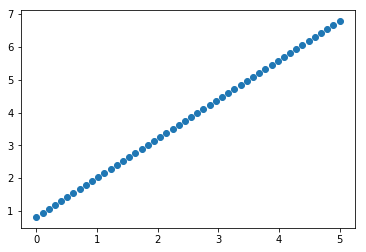

In [4]:
plt.scatter(x, y)

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.5*np.random.randn(50)

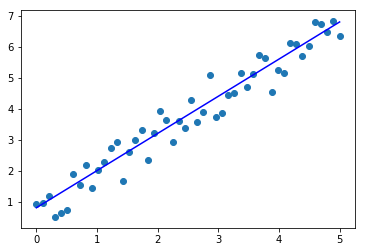

In [6]:
plt.scatter(x, y)
plt.plot(x, 1.2*x + 0.8, 'b')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做, 嗯, 線性迴歸。

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regr = LinearRegression()

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [9]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [10]:
X = x.reshape(len(x), 1)

In [11]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
Y = regr.predict(X)

In [13]:
regr.predict([[1.3]])

array([2.30079505])

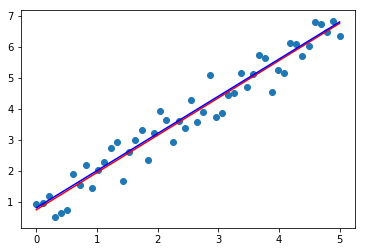

In [14]:
plt.scatter(x, y)
plt.plot(x, Y, 'r' )
plt.plot(x, 1.2*x + 0.8, 'b')

## 06-02 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [15]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.5*np.random.randn(200)

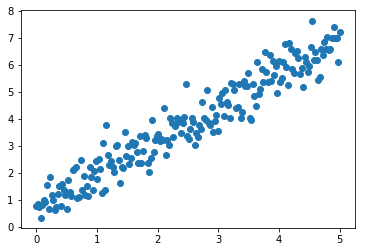

In [16]:
plt.scatter(x,y)

把原來的 `x`, `y` 中的 70% 給 training data, 30% 給 testing data。

In [17]:
from sklearn.model_selection import train_test_split

我們在「訓練」這個函數時只有以下這些資料。

In [18]:
X = x.reshape(len(x), 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 9487)

#### 用訓練資料來 fit 函數

記得現在我們只用 70% 的資料去訓練。

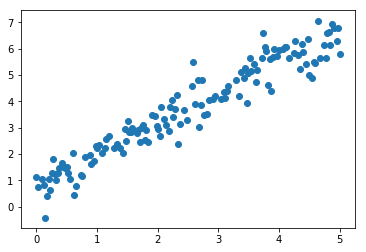

In [27]:
plt.scatter(x_train, y_train)

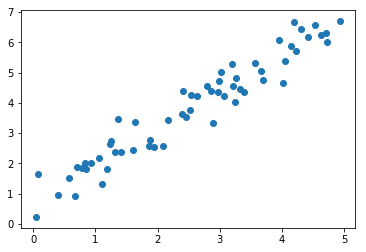

In [28]:
plt.scatter(x_test, y_test)

In [29]:
regr = LinearRegression()

In [30]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
Y_pred = regr.predict(x_test)

#### 用測試資料試試我們預測準不準

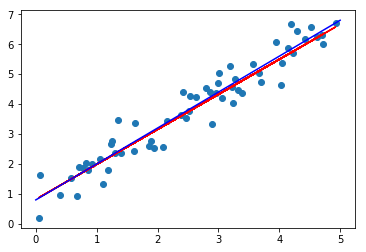

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')
plt.plot(x, 1.2*x+0.8, 'b')

## 06-03 不是線性的目標函數

事實上, 非線性的函數也可以用「線性迴歸」。比如說我們的函數原本是:

$$f(x) = b + w_0 x + w_1 x^2$$

用腳看就知不是線性的, 但我們也可令 $X = x$, $Y = x^2$, 於是原式變成:

$$f(X, Y) = b + w_0 X + w_1 Y,$$

立馬變線性函數!

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 生成假資料

In [36]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

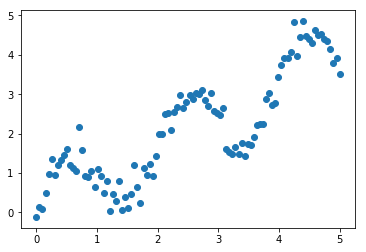

In [37]:
plt.scatter(x, y)

#### 標準線性學

In [38]:
X = x.reshape(len(x), 1)

In [39]:
regr_lin = LinearRegression()

In [41]:
regr_lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
Y_lin = regr_lin.predict(X)

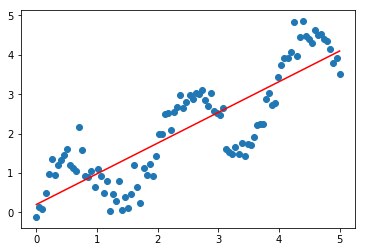

In [43]:
plt.scatter(x, y)
plt.plot(x, regr_lin.predict(X), 'r')

果然超級不準, 該如何是好?

#### 多項式

我們來用 6 次多項式學

In [44]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x])

In [45]:
regr_poly = LinearRegression()

In [46]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
Y_poly = regr_poly.predict(X_poly)

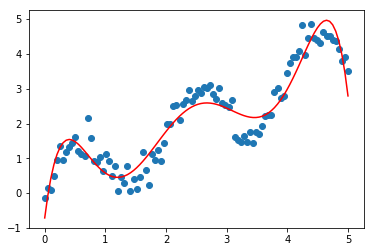

In [50]:
plt.scatter(x, y)
plt.plot(x, Y_poly, 'r')

#### 用 RBF!!

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [52]:
def RBF(x, center, sigma=0.3):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

畫出來看看!

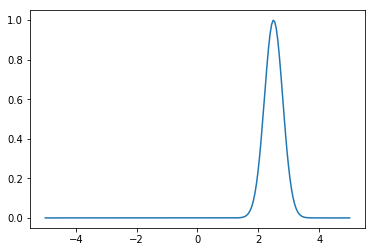

In [56]:
t = np.linspace(-5, 5, 200)

plt.plot(t, RBF(t, 2.5))

選 5 個不同 center 的 RBF, 也就是設

$$f(x) = w_1 \varphi_1(x) + w_2 \varphi_2(x) + w_3 \varphi_3(x) + w_4 \varphi_4(x) + w_5 \varphi_5(x)$$

In [57]:
X_rbf = np.array([[RBF(k, 0.5), 
                  RBF(k, 1.5),
                  RBF(k, 2.5),
                  RBF(k, 3.5),
                  RBF(k, 4.5)] for k in x])

In [58]:
regr_rbf = LinearRegression()

In [59]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
Y_rbf = regr_rbf.predict(X_rbf)

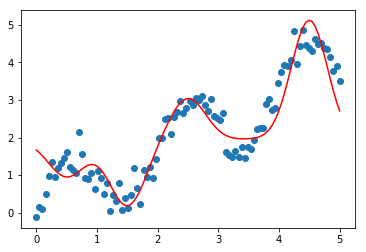

In [61]:
plt.scatter(x, y)
plt.plot(x, Y_rbf, 'r')

#### 三種一起比較

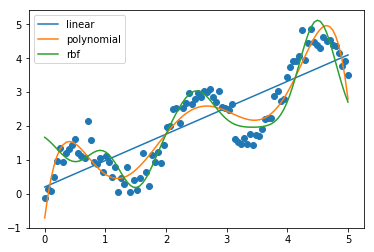

In [62]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()